***Import libraries***

In [54]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

***Read Dataset***

In [55]:
df = pd.read_csv("Cafebazar.csv")

In [56]:
df.head(10)

,Name,Developer,Installs,Category,Size,Rating,Votes,5 Stars,1 Star
0,دبل اسپورت,مجتبی رجبی,+۱۰,ورزشی,۱۳ مگابایت,5.0,1,100,0
1,Bet Winner Game - Betting Tips,BWG Team,<۱۰,ورزشی,۹ مگابایت,0.0,0,0,0
2,Football Radio LIVE,Toniapps,<۱۰,ورزشی,۱۲ مگابایت,0.0,0,0,0
3,Tournament brackets,Сит,<۱۰,ورزشی,۱۴۷ کیلوبایت,0.0,0,0,0
4,BUCS Play,Playwaze,<۱۰,ورزشی,۳۹ مگابایت,0.0,0,0,0
5,ProfitTips - Football Advisor,P Tips,<۱۰,ورزشی,۲۳ مگابایت,0.0,0,0,0
6,پا به پا - تمرین ورزشی+رژیم غذایی,پابه‌پا,+۲۰ هزار,تناسب اندام,۱۷ مگابایت,4.0,146,62,14
7,Boxing Showtimes,"ITPROBE, LLC",<۱۰,ورزشی,۲۰ مگابایت,0.0,0,0,0
8,CatchCorner by SI,Team63 Solutions Inc.,<۱۰,ورزشی,۷۳ مگابایت,0.0,0,0,0
9,Home Workout - تمرین در خانه بدون تجهیزات,Leap Fitness Group,+۱ میلیون,تناسب اندام,۲۱ مگابایت,4.8,5365,88,3


***Check The Dataset***

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20256 entries, 0 to 20255
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       20256 non-null  object 
 1   Developer  20256 non-null  object 
 2   Installs   20256 non-null  object 
 3   Category   20256 non-null  object 
 4   Size       20256 non-null  object 
 5   Rating     20256 non-null  float64
 6   Votes      20256 non-null  int64  
 7   5 Stars    20256 non-null  int64  
 8   1 Star     20256 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


In [58]:
df.describe()

,Rating,Votes,5 Stars,1 Star
count,20256.000000,2.025600e+04,20256.000000,20256.000000
mean,1.037589,1.654854e+03,18.240768,2.547147
std,1.880238,3.607289e+04,34.216377,9.470209
min,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000
75%,0.000000,0.000000e+00,0.000000,0.000000
max,5.000000,3.539868e+06,100.000000,100.000000


***Convert Persian Word to English Word***

In [59]:
persian_to_english = {
    'ا': 'a', 'ب': 'b', 'پ': 'p', 'ت': 't', 'ث': 's', 'ج': 'j', 
    'چ': 'ch', 'خ': 'kh', 'د': 'd', 'ذ': 'z', 'ر': 'r', 'ز': 'z', 
    'ژ': 'zh', 'س': 's', 'ش': 'sh', 'ص': 's', 'ض': 'z', 'ط': 't', 
    'ظ': 'z', 'ع': 'a', 'غ': 'gh', 'ف': 'f', 'ق': 'gh', 'ک': 'k',
    'گ': 'g', 'ل': 'l', 'م': 'm', 'ن': 'n', 'و': 'v', 'ه': 'h',
    'ی': 'y'
}

def transliterate(text):
    return ''.join(persian_to_english.get(char, char) for char in text)

df['En_Category'] = df['Category'].apply(transliterate)
df.head()

,Name,Developer,Installs,Category,Size,Rating,Votes,5 Stars,1 Star,En_Category
0,دبل اسپورت,مجتبی رجبی,+۱۰,ورزشی,۱۳ مگابایت,5.0,1,100,0,vrzshy
1,Bet Winner Game - Betting Tips,BWG Team,<۱۰,ورزشی,۹ مگابایت,0.0,0,0,0,vrzshy
2,Football Radio LIVE,Toniapps,<۱۰,ورزشی,۱۲ مگابایت,0.0,0,0,0,vrzshy
3,Tournament brackets,Сит,<۱۰,ورزشی,۱۴۷ کیلوبایت,0.0,0,0,0,vrzshy
4,BUCS Play,Playwaze,<۱۰,ورزشی,۳۹ مگابایت,0.0,0,0,0,vrzshy


***Check Install columns and Remove extras String***

In [60]:
df["Installs"].values
df.head()

,Name,Developer,Installs,Category,Size,Rating,Votes,5 Stars,1 Star,En_Category
0,دبل اسپورت,مجتبی رجبی,+۱۰,ورزشی,۱۳ مگابایت,5.0,1,100,0,vrzshy
1,Bet Winner Game - Betting Tips,BWG Team,<۱۰,ورزشی,۹ مگابایت,0.0,0,0,0,vrzshy
2,Football Radio LIVE,Toniapps,<۱۰,ورزشی,۱۲ مگابایت,0.0,0,0,0,vrzshy
3,Tournament brackets,Сит,<۱۰,ورزشی,۱۴۷ کیلوبایت,0.0,0,0,0,vrzshy
4,BUCS Play,Playwaze,<۱۰,ورزشی,۳۹ مگابایت,0.0,0,0,0,vrzshy


In [61]:
df["Install_con"] = df["Installs"].replace({
    r'\+': '', 
    r'<': '', 
    r'میلیون': '000000',  
    r'هزار': '000'         
}, regex=True)

farsi_to_english = {
    '۰': '0',
    '۱': '1',
    '۲': '2',
    '۳': '3',
    '۴': '4',
    '۵': '5',
    '۶': '6',
    '۷': '7',
    '۸': '8',
    '۹': '9'
}

def convert_farsi_to_english(farsi_num):
    for farsi_digit, english_digit in farsi_to_english.items():
        farsi_num = farsi_num.replace(farsi_digit, english_digit)
    return farsi_num

df['Install_con'] = df['Install_con'].apply(lambda x: convert_farsi_to_english(x.replace(' ', '')))
df['Install_con'] = pd.to_numeric(df['Install_con'], errors='coerce')




df.head()

,Name,Developer,Installs,Category,Size,Rating,Votes,5 Stars,1 Star,En_Category,Install_con
0,دبل اسپورت,مجتبی رجبی,+۱۰,ورزشی,۱۳ مگابایت,5.0,1,100,0,vrzshy,10
1,Bet Winner Game - Betting Tips,BWG Team,<۱۰,ورزشی,۹ مگابایت,0.0,0,0,0,vrzshy,10
2,Football Radio LIVE,Toniapps,<۱۰,ورزشی,۱۲ مگابایت,0.0,0,0,0,vrzshy,10
3,Tournament brackets,Сит,<۱۰,ورزشی,۱۴۷ کیلوبایت,0.0,0,0,0,vrzshy,10
4,BUCS Play,Playwaze,<۱۰,ورزشی,۳۹ مگابایت,0.0,0,0,0,vrzshy,10


In [62]:
df["Install_con"].values

array([   10,    10,    10, ...,  2000, 50000, 50000], dtype=int64)

***Check Name columns and Remove Extra String***

In [63]:
def clean_name(name):
   
    match = re.split(r'[\s\|\-:]', name, 1) 
    return match[0]  # Get the first part

df['Cleaned_Name'] = df['Name'].apply(clean_name)

df.head()

,Name,Developer,Installs,Category,Size,Rating,Votes,5 Stars,1 Star,En_Category,Install_con,Cleaned_Name
0,دبل اسپورت,مجتبی رجبی,+۱۰,ورزشی,۱۳ مگابایت,5.0,1,100,0,vrzshy,10,دبل
1,Bet Winner Game - Betting Tips,BWG Team,<۱۰,ورزشی,۹ مگابایت,0.0,0,0,0,vrzshy,10,Bet
2,Football Radio LIVE,Toniapps,<۱۰,ورزشی,۱۲ مگابایت,0.0,0,0,0,vrzshy,10,Football
3,Tournament brackets,Сит,<۱۰,ورزشی,۱۴۷ کیلوبایت,0.0,0,0,0,vrzshy,10,Tournament
4,BUCS Play,Playwaze,<۱۰,ورزشی,۳۹ مگابایت,0.0,0,0,0,vrzshy,10,BUCS


***Make heatmap and Find Correlation***

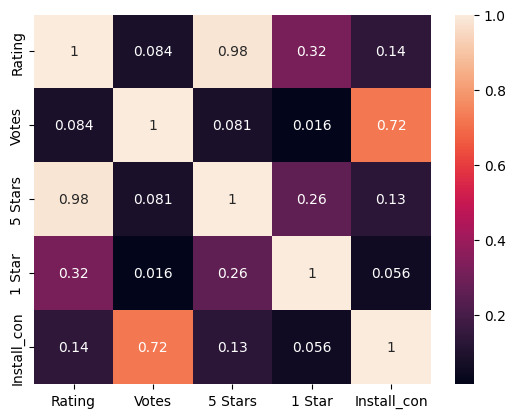

,Rating,Votes,5 Stars,1 Star,Install_con
Rating,1.000000,0.084391,0.984169,0.315730,0.135653
Votes,0.084391,1.000000,0.080980,0.015586,0.720537
5 Stars,0.984169,0.080980,1.000000,0.259227,0.128841
1 Star,0.315730,0.015586,0.259227,1.000000,0.055908
Install_con,0.135653,0.720537,0.128841,0.055908,1.000000


In [64]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot= True)
plt.show()
numeric_df.corr()

***Delete irrelevant Columns***

In [65]:
df.drop(columns= ["Votes"], inplace = True)

In [66]:
df.head()

,Name,Developer,Installs,Category,Size,Rating,5 Stars,1 Star,En_Category,Install_con,Cleaned_Name
0,دبل اسپورت,مجتبی رجبی,+۱۰,ورزشی,۱۳ مگابایت,5.0,100,0,vrzshy,10,دبل
1,Bet Winner Game - Betting Tips,BWG Team,<۱۰,ورزشی,۹ مگابایت,0.0,0,0,vrzshy,10,Bet
2,Football Radio LIVE,Toniapps,<۱۰,ورزشی,۱۲ مگابایت,0.0,0,0,vrzshy,10,Football
3,Tournament brackets,Сит,<۱۰,ورزشی,۱۴۷ کیلوبایت,0.0,0,0,vrzshy,10,Tournament
4,BUCS Play,Playwaze,<۱۰,ورزشی,۳۹ مگابایت,0.0,0,0,vrzshy,10,BUCS


***Convert Rating columns to int64 as Rate columns and Remove old Rating columns***

In [67]:
df["Rate"] = df["Rating"].astype('int64')
df.drop(columns= "Rating", inplace= True)
df.head(20)

,Name,Developer,Installs,Category,Size,5 Stars,1 Star,En_Category,Install_con,Cleaned_Name,Rate
0,دبل اسپورت,مجتبی رجبی,+۱۰,ورزشی,۱۳ مگابایت,100,0,vrzshy,10,دبل,5
1,Bet Winner Game - Betting Tips,BWG Team,<۱۰,ورزشی,۹ مگابایت,0,0,vrzshy,10,Bet,0
2,Football Radio LIVE,Toniapps,<۱۰,ورزشی,۱۲ مگابایت,0,0,vrzshy,10,Football,0
3,Tournament brackets,Сит,<۱۰,ورزشی,۱۴۷ کیلوبایت,0,0,vrzshy,10,Tournament,0
4,BUCS Play,Playwaze,<۱۰,ورزشی,۳۹ مگابایت,0,0,vrzshy,10,BUCS,0
5,ProfitTips - Football Advisor,P Tips,<۱۰,ورزشی,۲۳ مگابایت,0,0,vrzshy,10,ProfitTips,0
6,پا به پا - تمرین ورزشی+رژیم غذایی,پابه‌پا,+۲۰ هزار,تناسب اندام,۱۷ مگابایت,62,14,tnasb andam,20000,پا,4
7,Boxing Showtimes,"ITPROBE, LLC",<۱۰,ورزشی,۲۰ مگابایت,0,0,vrzshy,10,Boxing,0
8,CatchCorner by SI,Team63 Solutions Inc.,<۱۰,ورزشی,۷۳ مگابایت,0,0,vrzshy,10,CatchCorner,0
9,Home Workout - تمرین در خانه بدون تجهیزات,Leap Fitness Group,+۱ میلیون,تناسب اندام,۲۱ مگابایت,88,3,tnasb andam,1000000,Home,4


***Creats a new Dataset with clean columns***

In [68]:
df_cleaned = df.drop(columns=["Category", "Installs", "Name","Developer","Size"])

df_cleaned.to_csv("Bazar_Clean.csv", index=False)


In [69]:
df = pd.read_csv("Bazar_Clean.csv")
df.head()

,5 Stars,1 Star,En_Category,Install_con,Cleaned_Name,Rate
0,100,0,vrzshy,10,دبل,5
1,0,0,vrzshy,10,Bet,0
2,0,0,vrzshy,10,Football,0
3,0,0,vrzshy,10,Tournament,0
4,0,0,vrzshy,10,BUCS,0


***Make Pairplot***

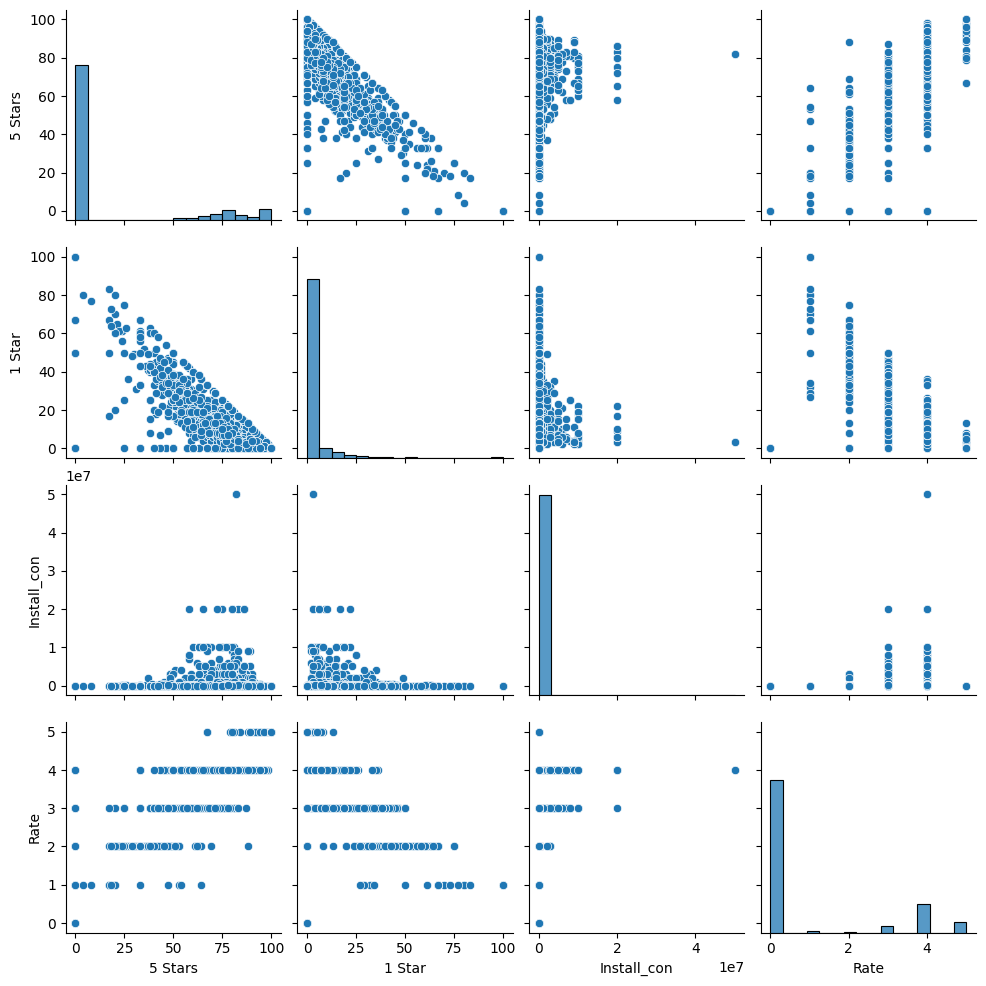

In [79]:
sns.pairplot(df)
plt.show()

***Make plot form Category and Install to Find a Which Category has most installed app***

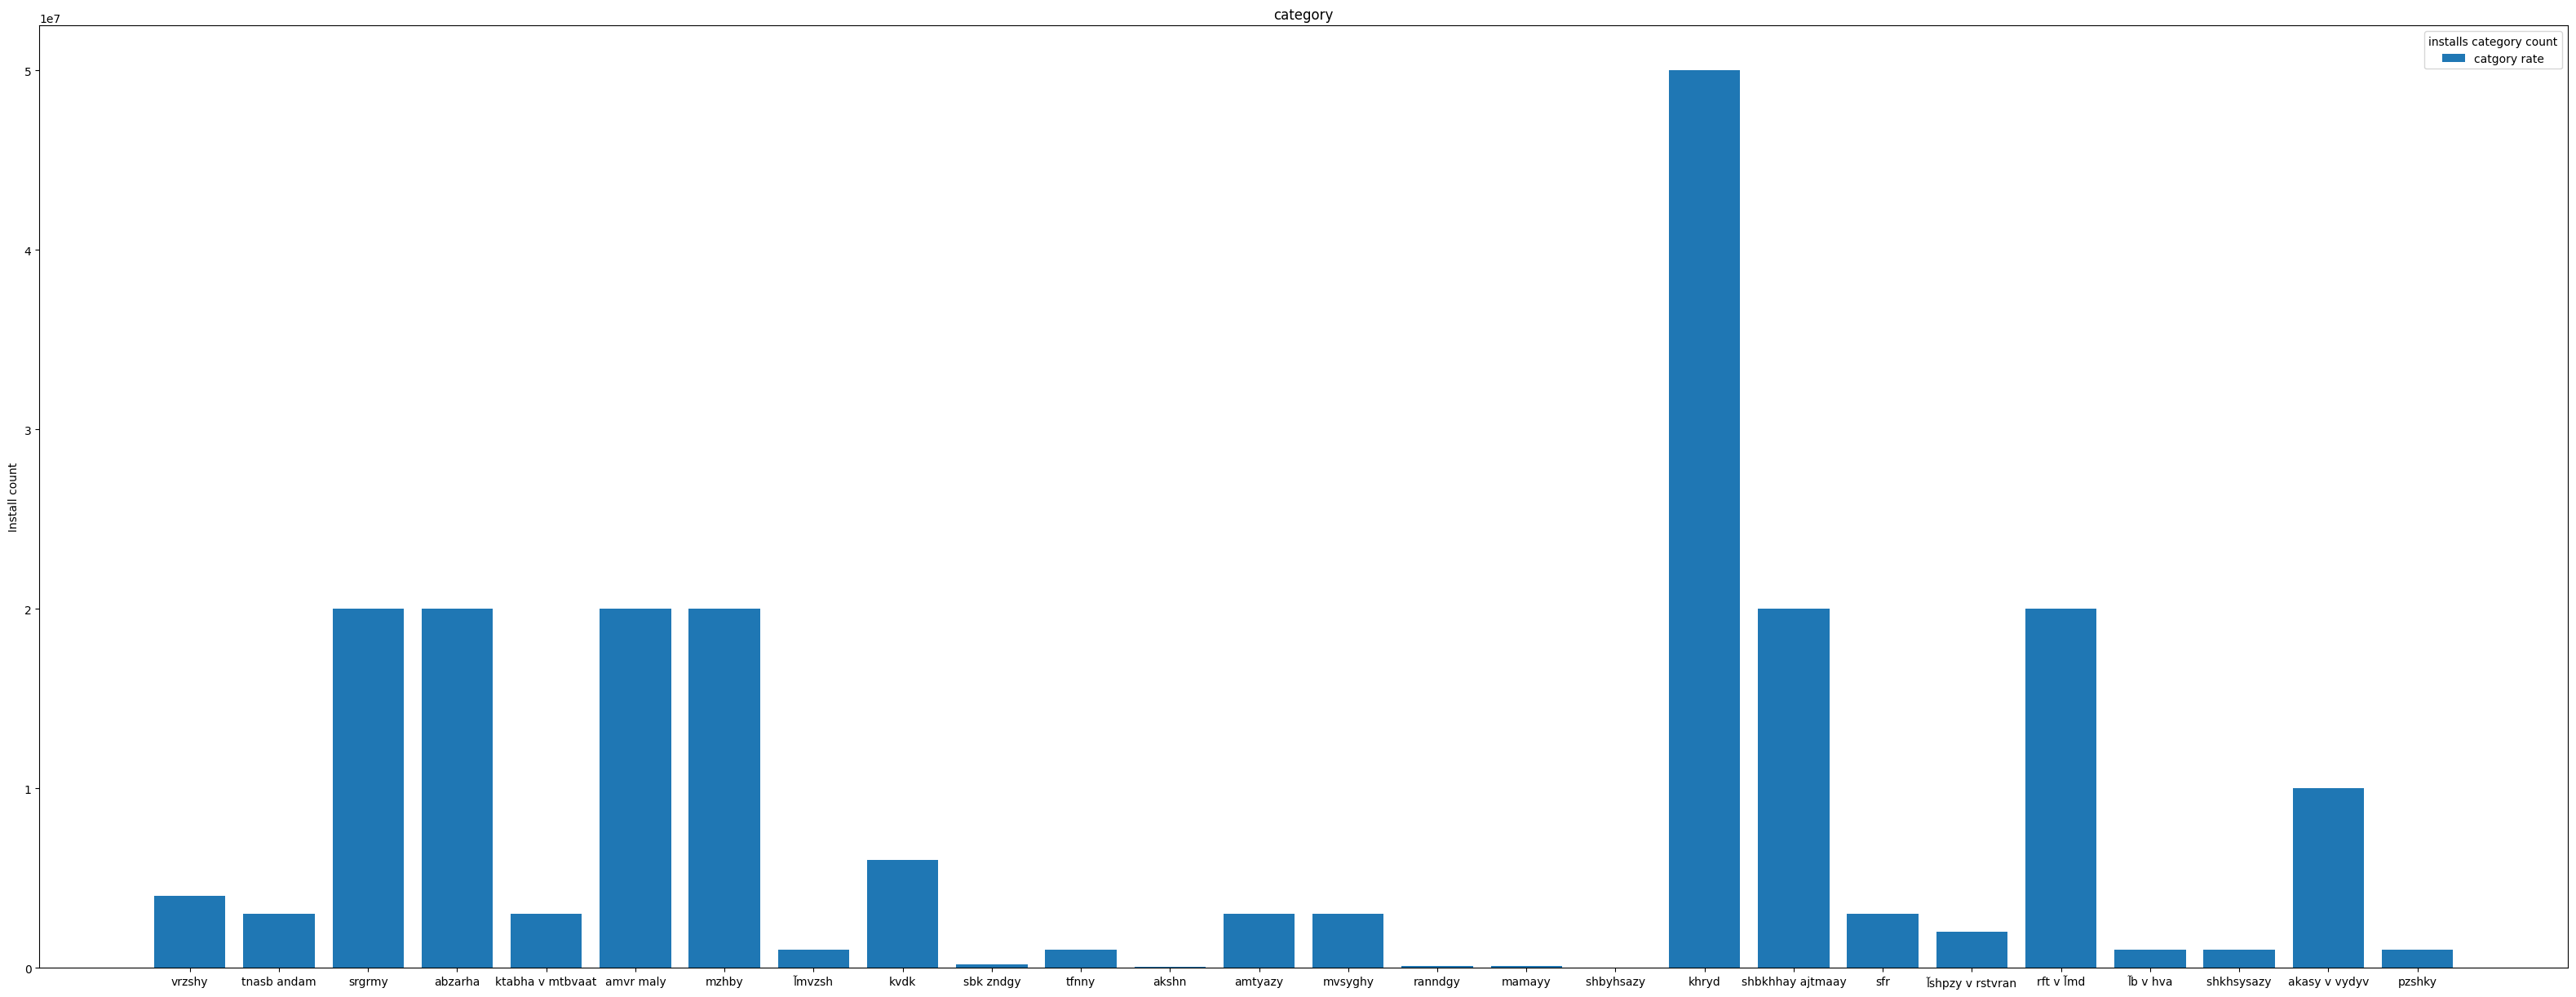

In [72]:
fig, ax = plt.subplots(figsize=(40,15))

ax.bar( df["En_Category"], df["Install_con"], label="catgory rate")

ax.set_ylabel('Install count')
ax.set_title('category')
ax.legend(title='installs category count')

plt.show()

In [73]:
df["En_Category"].values

array(['vrzshy', 'vrzshy', 'vrzshy', ..., 'tnasb andam', 'tnasb andam',
       'tnasb andam'], dtype=object)

***Create a new variable containing the kharid category because it is the most installed category*** 

In [74]:
khryd = df[df['En_Category'] == 'khryd']
khryd.head(10)

,5 Stars,1 Star,En_Category,Install_con,Cleaned_Name,Rate
1768,65,17,khryd,20000,کتابینو,4
1772,81,2,khryd,6000000,ترب,4
1797,66,15,khryd,20000,پاتوق,4
1814,70,8,khryd,100000,کنسل,4
1826,80,2,khryd,10000000,شیپور,4
1833,73,8,khryd,500000,بازار,4
1850,82,3,khryd,50000000,دیوار,4
1861,61,17,khryd,200000,کمدا,3
2036,59,13,khryd,500000,نت,4
2058,73,4,khryd,500000,تخفیفان,4


***To find the most installed app we create a new variable***

In [75]:
result = khryd.loc[khryd.groupby("Install_con")["Cleaned_Name"].idxmax()]


In [76]:
result.loc[result["Install_con"] > 0, "Install_con"].max()

50000000

***Divar app is most downloaded app in Bazaar app store***

In [77]:
result.loc[result["Install_con"] == 50000000]

,5 Stars,1 Star,En_Category,Install_con,Cleaned_Name,Rate
1850,82,3,khryd,50000000,دیوار,4


***Finish***

**⚡Powerd by miracle⚡**